![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Resolvendo sistemas especiais

## Questão 1: Algoritmo

Uma matriz é dita tridiagonal quando só possui entradas diferentes de zero na diagonal,
e imediatamente acima ou abaixo dela.

Explique porque, ao fazer a eliminação, o algoritmo só precisa operar nas três "diagonais centrais".
Inclusive, dê um exemplo de uma matriz, com muitos zeros, mas para a qual o algoritmo de eliminação
vai ter que acessar e calcular nas entradas correspondentes.

Vejamos o caso em que temos um sistema linear onde, com a exceção das 3 diagonais em questão, o restante da matriz possui apenas 0's. Em especial, vamos considerar a matriz 4x4:
<!-- ![title](Tridiagonal_matrix_algorithm.png) -->
$\begin{bmatrix}
    b_{1}       & c_{1} & 0 & 0\\
    a_{2}       & b_{2} & c_{2} & 0 \\
    0       & a_{3} &  b_{3} & c_{3}\\
    0 & 0 & a_{4} & b_{4} 
\end{bmatrix}$
<p>
A eliminação gaussiana é tal que, para zerar o elemento $a_{2}$, precisamos multiplicar a primeira linha por $\frac{-a_2}{b_1}$, somar ambas as linhas 1 e 2 e, por fim, colocar o resultado na segunda. Isso nos dá a seguinte matriz:
<p>
$\begin{bmatrix}
    -a_{2}       & \frac{-a_2c_{1}}{b_1} & 0 & 0\\
    0       & b_2 -a_2\frac{c_1}{b1} & c_{2} & 0 \\
    0       & a_{3} &  b_{3} & c_{3}\\
    0 & 0 & a_{4} & b_{4} 
\end{bmatrix}$

<p>
 Fazendo $c^{'}_{1}=-\frac{a_2c_1}{b_1}$, e $b^{'}_{2}=b_2+c^{'}_{1}$:
 <p>
    $\begin{bmatrix}
    -a_{2}       & c^{'}_{1} & 0 & 0\\
    0       & b^{'}_{2} & c_{2} & 0 \\
    0       & a_{3} &  b_{3} & c_{3}\\
    0 & 0 & a_{4} & b_{4} 
\end{bmatrix}$
  <p>
 Agora precisamos zerar o termo $a_3$. Para tal vamos multiplicar a linha 2 por $-a_3\frac{b_1}{b_2b_1 -a_2c_1}$, ou $\frac{-a_3}{b^{'}_{2}}$ e repetir o procedimento. Isso nos dá a seguinte matriz:
<p>
$\begin{bmatrix}
    -a_{2}       & c^{'}_{1} & 0 & 0\\
    0       & -a_3 & -a_3\frac{c_{2}}{b^{'}_{2}} & 0 \\
    0       & 0 &  b_{3} -a_3\frac{c_{2}}{b^{'}_{2}} & c_{3}\\
    0 & 0 & a_{4} & b_{4} 
\end{bmatrix}$
  <p>
 Fazendo $c^{'}_{2}=-a_3\frac{c_{2}}{b^{'}_{2}}$, e $b^{'}_{3}=b_3+c^{'}_{2}$:
 <p>
  $\begin{bmatrix}
    -a_{2}       & c^{'}_{1} & 0 & 0\\
    0       & -a_3 & c^{'}_{2} & 0 \\
    0       & 0 &  b^{'}_{3} & c_{3}\\
    0 & 0 & a_{4} & b_{4} 
\end{bmatrix}$   
 <p>  
Por fim, precisamos zerar o termo $a_4$. Para tal vamos multiplicar a linha 2 por $\frac{-a_4}{b^{'}_{3}}$ e somá-la com a linha 4:
 <p>
  $\begin{bmatrix}
    -a_{2}       & c^{'}_{1} & 0 & 0\\
    0       & -a_3 & c^{'}_{2} & 0 \\
    0       & 0 &  -a_4 & -c_{3}\frac{a_4}{b^{'}_{3}}\\
    0 & 0 & 0 & b_{4} - c_{3}\frac{a_4}{b^{'}_{3}}
\end{bmatrix}$   
 <p>  
 Fazendo $c^{'}_{3}=-c_{3}\frac{a_4}{b^{'}_{3}}$, e $b^{'}_{4}=b_4+c^{'}_{3}$:
 <p>
  $\begin{bmatrix}
    -a_{2}       & c^{'}_{1} & 0 & 0\\
    0       & -a_3 & c^{'}_{2} & 0 \\
    0       & 0 &  -a_4 & c^{'}_{3}\\
    0 & 0 & 0 & b^{'}_{4}
\end{bmatrix}$   
 <p>  
  Assim, podemos generalizar os passos, independente da matriz, pela seguinte fórmula:
     $c^{'}_{i}=-c_{i}\frac{a_{i+1}}{b^{'}_{i}}$ e $b^{'}_{i+1}=b_{i+1}+c^{'}_{i}$
 <p> Com isso, vemos que não apenas a fórmula acima não depende dos demais termos da matriz fora das diagonais de interesse, como também existe uma recursão implícita, sendo necessário apenas um único loop para resolver o sistemas.
 <p>
     Por outro lado, vejamos o caso em que temos um elemento a mais na matriz, no lugar de um dos 0's:
 <p>
$\begin{bmatrix}
    b_{1}       & c_{1} & 0 & 0\\
    a_{2}       & b_{2} & c_{2} & 0 \\
    0       & a_{3} &  b_{3} & c_{3}\\
    d & 0 & a_{4} & b_{4} 
\end{bmatrix}$
 <p>
   Seguimos tendo que eliminar o elemento $a_{2}$ primeiramente. Após isso, a operação seguinte envolve eliminar o elemento $d$. Para isso precisamos multiplicar a primeira linha por uma constante $k$ e somá-la com a última linha:
 <p>
    $\begin{bmatrix}
    -a_{2}k       & c^{'}_{1}k & 0 & 0\\
    0       & b^{'}_{2} & c_{2} & 0 \\
    0       & a_{3} &  b_{3} & c_{3}\\
    d & 0 & a_{4} & b_{4} 
\end{bmatrix}$
<p>
  Após somar ambas as linhas:
 <p>
    $\begin{bmatrix}
    -a_{2}k       & c^{'}_{1}k & 0 & 0\\
    0       & b^{'}_{2} & c_{2} & 0 \\
    0       & a_{3} &  b_{3} & c_{3}\\
    0 & c^{'}_{1}k & a_{4} & b_{4} 
\end{bmatrix}$
 <p>
  Notamos portanto que a adição de um termo $d$ fez com que, além da posição $A[3][0]$, precisamos agora zerar o elemento $A[3][1]$, aumentando a complexidade da solução. Assim, o caso especial em que temos um triângulo inferior e superior de zeros reduz bastante a complexidade do algoritmo de eliminação.

Agora, escreva a função `tridiag_solve` para resolver sistemas tridiagonais, ou seja,
aqueles cuja matriz de coeficientes é tridiagonal.

Esta função deve realizar o algoritmo de eliminação,
mas, para ter uma boa performance, opere apenas nas entradas das diagonais centrais.

In [2]:
def zero_nth_diag_below(A,b,dim,n):
    for i in range(dim-n):
        for row in range(1,n+1):
            if(np.abs(A[i+row,i]) > 0):
                cte = -A[i+row,i]/A[i,i]
                A[i, i:i+n+1] *= cte
                A[i+row, i:i+n+1] += A[i, i:i+n+1]
                b[i] *= cte
                b[i+row] += b[i]
    for i in range(dim-n,n+1):
        print(i)
        for row in range(i+1,dim):
            if(np.abs(A[row,i]) > 0):
                cte = -A[row,i]/A[i,i]
                A[i, i:] *= cte
                A[row, i:] += A[i, i:]
                b[i] *= cte
                b[row] += b[i]
    return A,b

In [3]:
def tridiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float))
    b = np.copy(np.asarray(b, dtype=np.float))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
#     for i in range(n-1):
#         cte = -A[i+1][i]/A[i][i]
#         A[i,i:i+2] *= cte
#         A[i+1,i:i+2] += A[i,i:i+2]
#         b[i] *= cte
#         b[i+1] += b[i]
    A,b = zero_nth_diag_below(A,b,n,1)
    xs = np.zeros(b.shape)
    xs[n-1] = b[n-1]/A[n-1][n-1]
    for i in range(2,n+1):
        xs[n-i] = (b[n-i] - A[n-i][n-i+1]*xs[n-i+1])/A[n-i][n-i]
    return xs

In [4]:
A = np.array([
        [1,2,0,0],
        [3,4,5,0],
        [0,6,7,8],
        [0,0,9,10]
    ])
xs=tridiag_solve(A, np.array([[1,1,1,1],
                            [2,2,2,2],
                            [3,3,3,3],
                            [4,4,4,4]]
                            ))

In [5]:
xs

array([[ 1.08108108,  1.08108108,  1.08108108,  1.08108108],
       [-0.04054054, -0.04054054, -0.04054054, -0.04054054],
       [-0.21621622, -0.21621622, -0.21621622, -0.21621622],
       [ 0.59459459,  0.59459459,  0.59459459,  0.59459459]])

In [6]:
np.matmul(A,xs)

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])

Qual o papel do primeiro assert?

O primeiro assert garante que a matriz é quadrada.

In [7]:
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

x1 = np.linalg.solve(A,b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-14, rtol=1e-14)

In [8]:
b

[1, 1, 1]

In [9]:
np.matmul(A,tridiag_solve(A, b))

array([1., 1., 1.])

In [10]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

Se você não tivesse acesso a `np.linalg.solve`, como você poderia testar sua função?
Explique abaixo, e dê um exemplo de teste na caixa seguinte.

Poderíamos simplesmente multiplicar a matriz original, antes de ter feito a eliminação, pelo o vetor de x's encontrados. Se o resultado fosse compatível com o b original, então a solução estaria correta. Do contrário, errada.

In [11]:
# A = np.array([
#         [1,2,0,0],
#         [3,4,5,0],
#         [0,6,7,8],
#         [0,0,9,10]
#     ])
# b = np.array([1,1,1,1])
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

xs=tridiag_solve(A,b)
assert np.allclose(np.matmul(A,xs) , b, atol=1e-14, rtol=1e-14)

## Questão 2: Tempos

Para cada um dos `ns` dados a seguir, monte um sistema tridiagonal $n \times n$,
e calcule o tempo (usando `time`) para:
1. Criar a matriz A e o vetor b (podem ser aleatórios, podem não ser)
2. Resolver o sistema usando `tridiag_solve`

Armazene os tempos em duas listas, `t_create` e `t_solve`.

Obs: o caixa abaixo pode usar algo como 2G de RAM, por conta das matrizes 8k
(ou até mais, dependendo de **como** você criar as matrizes).
Assim, para testar, diminua a amplitude do logspace, terminando em $2^{10}$ em vez de $2^{13}$.
Se você não conseguir fazer funcionar até $2^{13}$,
reduza o maior valor do `logspace`, mas não reduza demais.

In [12]:
ns = np.logspace(4,13, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    start_time = time()
    diag = np.arange(n)
    A = np.diag(diag) + np.diag(diag[1:]*-1, k=1) + np.diag(diag[1:]*2, k=-1)
    b = np.random.randn(n)
    t_create.append(time() - start_time)
    start_time = time()
    tridiag_solve(A,b)
    t_solve.append(time() - start_time)

<ipython-input-2-cd5bb07b7cbb>:5: RuntimeWarning: divide by zero encountered in double_scalars
  cte = -A[i+row,i]/A[i,i]
<ipython-input-2-cd5bb07b7cbb>:6: RuntimeWarning: invalid value encountered in multiply
  A[i, i:i+n+1] *= cte
<ipython-input-2-cd5bb07b7cbb>:8: RuntimeWarning: invalid value encountered in double_scalars
  b[i] *= cte


Agora, faça um gráfico destes tempos, em função de $n$.

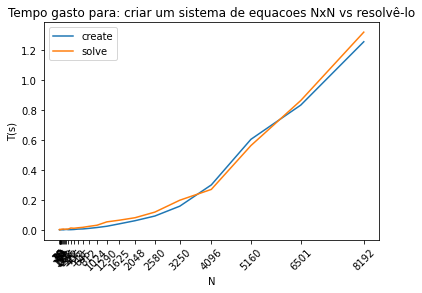

In [13]:
plt.plot(ns,t_create,label="create")
plt.plot(ns,t_solve,label="solve")
plt.title("Tempo gasto para: criar um sistema de equacoes NxN vs resolvê-lo")
plt.xlabel("N")
plt.ylabel("T(s)")
plt.legend()
plt.xticks(ns,rotation=45)
ax = plt.gca()

In [14]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

In [15]:
for l in ax.lines:
    xs = l.get_xdata()
    assert min(xs) == 2**4
    assert max(xs) <= 2**13

In [16]:
ax = None

Qual etapa demora mais?
Porquê você acha que isso acontece?

A etapa que mais demora é a de criar o sistema de equações. Isso porque envolve $N^2 + N$ operações - complexidade $O(N^2)$ -, que são de atribuir os valores a cada posição da matriz A e ao vetor b, ao passo que resolver é na ordem de N operações - complexidade $O(N)$ - , conforme discutido acima. 

Agora, faça novos gráficos, para tentar descobrir a taxa de crescimento destes tempos:
se é linear, quadrático, exponencial, ... em função de $n$.

E se são a mesma taxa ou não!

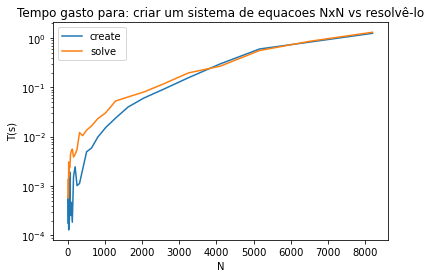

In [17]:
plt.plot(ns,t_create,label="create")
plt.plot(ns,t_solve,label="solve")
plt.title("Tempo gasto para: criar um sistema de equacoes NxN vs resolvê-lo")
plt.xlabel("N")
plt.ylabel("T(s)")
plt.legend()
plt.yscale("LOG")

## Fazendo um sistemas de equações usando polinomio de ordem 2 e outro com uma exponencial: encontrar qual melhor se ajusta por minimos quadrados

In [18]:
def MAE(f,xs,true):
    pred = f(xs)
    return np.sum(np.abs(true-pred))/len(xs)
#funcao que retorna 1 independente de x
#dado os coeficientes e as funções, retorna o modelo de predicao exponencial
def make_f(coefs):
    def model(x):
        return np.exp(coefs[0] + coefs[1]*x)
    return model

-------------------------
Modelando o tempo de create da matriz
Coefs poly create:  [-2.07365860e-03 -1.14006325e-06  1.93682845e-08]
Coefs exp create:  [-6.97398343e+00  1.18211235e-03]
MEAN ABSOLUTE ERROR
poly:  0.011262377963984521  exponential:  0.559732444699985
-------------------------
Modelando o tempo de solve da matriz
Coefs poly solve:  [ 5.73620741e-03 -4.21743762e-06  2.02740841e-08]
Coefs exp solve:  [-5.40386894e+00  8.91659932e-04]
MEAN ABSOLUTE ERROR
poly:  0.014958469688696312  exponential:  0.23665730484656036


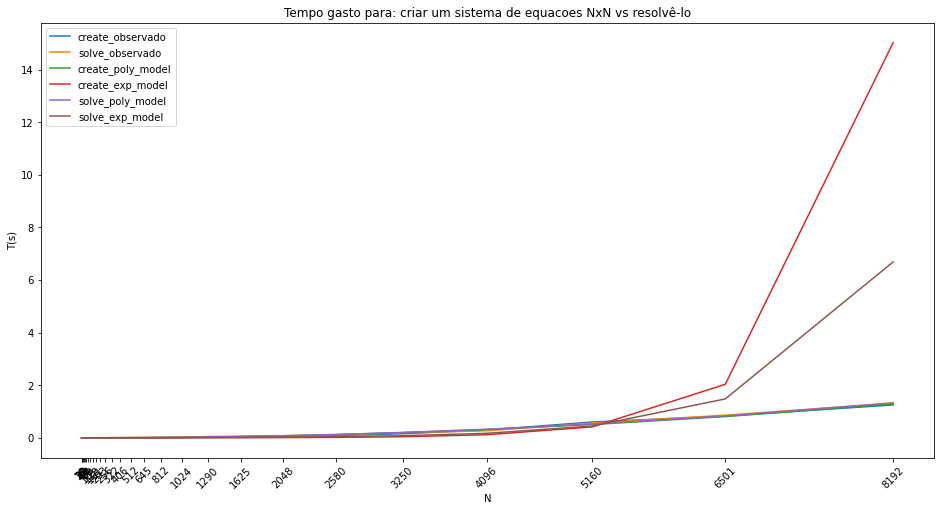

In [19]:
plt.figure(figsize=(16,8))
plt.plot(ns,t_create,label="create_observado")
plt.plot(ns,t_solve,label="solve_observado")
plt.title("Tempo gasto para: criar um sistema de equacoes NxN vs resolvê-lo")
plt.xlabel("N")
plt.ylabel("T(s)")
plt.xticks(ns,rotation=45)
for y,name in zip([t_create,t_solve],["create","solve"]):
    print("-------------------------")
    print(f"Modelando o tempo de {name} da matriz")
    A = np.vander(ns,N=3)
    b = np.array(y)
    coefs, *_ = np.linalg.lstsq(A,b,rcond=None)
    coefs = np.flip(coefs)
    print(f"Coefs poly {name}: ",coefs,)
    poly = np.poly1d(coefs[::-1])
    plt.plot(ns,poly(ns),label=f"{name}_poly_model")
    A = np.vander(ns,N=2)
    coefs, *_ = np.linalg.lstsq(np.matmul(A.T,A),np.matmul(A.T,np.log(b)),rcond=None)
    coefs = np.flip(coefs)
    print(f"Coefs exp {name}: ",coefs)
    model = make_f(coefs)
    plt.plot(ns,model(ns),label=f"{name}_exp_model")
    print("MEAN ABSOLUTE ERROR")
    print("poly: ",MAE(poly,ns,t_create)," exponential: ",MAE(model,ns,t_create))
# plt.ylim(0,2)
plt.legend()

Comente

Acima mostramos duas modelagens para os tempos obtidos: um utilizando um polinômio na forma $y = A + BX + CX^2$ e outro utilizando $y = Be^{CX}$. Esse último, para resolver no formato de um sistema linear, primeiramente foi feito: $log(y) = logB + CX$. Em seguida, aplicou-se: $[A.T * A] * X = B$, sendo $A_{Nx2}$ e N = len(ns). Para avaliar o modelo que melhor se ajustou, calculou-se o Mean Absolute Error, dado por $\sum_i |y_i^{real} - y_{i}^{pred}|/N$. 
<p>
 Vemos tanto pelos MAE quanto pelas curvas ajustadas que os dados tem o comportamento melhor modelado por um polinômio de grau 2. No caso do tempo de criação, mínimos quadrados nos dá os coeficientes: $y = <1.22e-02, -4.36e-05, 2.71e-08>.<1, X, X^2>^T$. Já para o tempo de resolução, temos: $y = <1.06e-02, -2.24e-05, 2.08e-08>.<1, X, X^2>^T$.
<p>
    Em resumo: o coeficiente do termo quadrático é menor para o tempo de criação, mas o termo linear é maior.

## Questão 3: Sistemas pentadiagonais

Agora, suponha que a matriz $A$ é pentadiagonal, ou seja, as entradas não-nulas
podem estar até 2 linhas acima ou abaixo da diagonal principal.
Generalize o seu programa para resolver sistemas pentadiagonais.

In [20]:
def pentadiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float))
    b = np.copy(np.asarray(b, dtype=np.float))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    # YOUR CODE HERE
    
    for i in range(2,m):
        mul = -A[i,i-2]/A[i-2,i-2]
        A[i,i-2] = 0
        A[i,i-1] += A[i-2,i-1]*mul
        A[i,i] += A[i-2,i]*mul
        b[i] += b[i-2]*mul
        
        mul = -A[i-1,i-2]/A[i-2,i-2]
        A[i-1,i-2] = 0
        A[i-1,i-1] += A[i-2,i-1]*mul
        A[i-1,i] += A[i-2,i]*mul
        b[i-1] += b[i-2]*mul
    
    mul = -A[-1,-2]/A[-2,-2]
    A[-1,-2] = 0
    A[-1,-1] += A[-2,-1]*mul
    b[-1]+=b[-2]*mul
    
    resposta = b[:]
    
    resposta[-1] = resposta[-1]/A[-1,-1]
    resposta[-2]-=A[-2,-2+1]*b[-2+1]
    resposta[-2]= resposta[-2]/A[-2,-2]
    
    for i in range(3,len(b)+1):
        resposta[-i]-=(A[-i,-i+1]*b[-i+1]+A[-i,-i+2]*b[-i+2])
        resposta[-i]= resposta[-i]/A[-i,-i]
    return resposta

In [21]:
A = np.array([
        [1,2,0,0],
        [3,4,5,0],
        [0,6,7,8],
        [0,0,9,10]
    ])
xs=pentadiag_solve(A, np.array([[1,1,1,1],
                            [2,2,2,2],
                            [3,3,3,3],
                            [4,4,4,4]]
                            ))

In [22]:
xs

array([[ 1.08108108,  1.08108108,  1.08108108,  1.08108108],
       [-0.04054054, -0.04054054, -0.04054054, -0.04054054],
       [-0.21621622, -0.21621622, -0.21621622, -0.21621622],
       [ 0.59459459,  0.59459459,  0.59459459,  0.59459459]])

In [23]:
np.matmul(A,xs)

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])

In [24]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x2 = tridiag_solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x3, x2, atol=1e-13, rtol=1e-13)

In [25]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,-2,-2], k=2) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

Repita os cálculos de tempo, para resolver sistemas de dimensão até $2^{13}$.

In [26]:
ns = np.logspace(4,13, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    start_time = time()
    diag = np.arange(n)
    A = np.diag(diag) + np.diag(diag[1:]*-1, k=1) + np.diag(diag[2:]*-2, k=2) + np.diag(diag[1:]*2, k=-1) + np.diag(diag[2:]*4, k=-2)
    b = np.random.randn(n)
    t_create.append(time() - start_time)
    start_time = time()
    pentadiag_solve(A,b)
    t_solve.append(time() - start_time)

<ipython-input-20-80f32d4a8cdb>:10: RuntimeWarning: divide by zero encountered in double_scalars
  mul = -A[i,i-2]/A[i-2,i-2]
<ipython-input-20-80f32d4a8cdb>:16: RuntimeWarning: divide by zero encountered in double_scalars
  mul = -A[i-1,i-2]/A[i-2,i-2]
<ipython-input-20-80f32d4a8cdb>:12: RuntimeWarning: invalid value encountered in double_scalars
  A[i,i-1] += A[i-2,i-1]*mul
<ipython-input-20-80f32d4a8cdb>:14: RuntimeWarning: invalid value encountered in double_scalars
  b[i] += b[i-2]*mul
<ipython-input-20-80f32d4a8cdb>:16: RuntimeWarning: invalid value encountered in double_scalars
  mul = -A[i-1,i-2]/A[i-2,i-2]


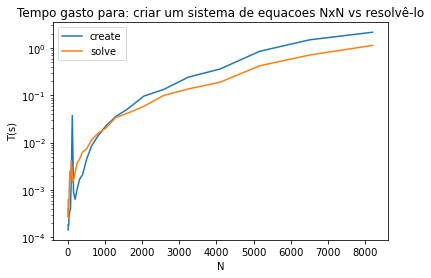

In [27]:
plt.plot(ns,t_create,label="create")
plt.plot(ns,t_solve,label="solve")
plt.title("Tempo gasto para: criar um sistema de equacoes NxN vs resolvê-lo")
plt.xlabel("N")
plt.ylabel("T(s)")
plt.legend()
plt.yscale("LOG")
ax = plt.gca()

In [28]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

-------------------------
Modelando o tempo de create da matriz
Coefs poly create:  [ 8.46467904e-03 -4.04793641e-05  3.79562784e-08]
-------------------------
Modelando o tempo de solve da matriz
Coefs poly solve:  [ 7.41593619e-03 -1.94081123e-05  1.91867610e-08]


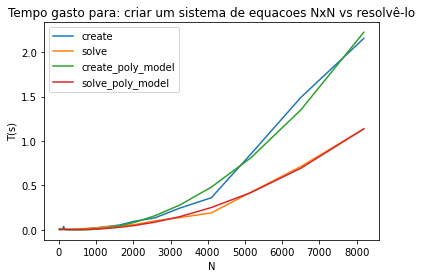

In [29]:
plt.plot(ns,t_create,label="create")
plt.plot(ns,t_solve,label="solve")
plt.title("Tempo gasto para: criar um sistema de equacoes NxN vs resolvê-lo")
plt.xlabel("N")
plt.ylabel("T(s)")
for y,name in zip([t_create,t_solve],["create","solve"]):
    print("-------------------------")
    print(f"Modelando o tempo de {name} da matriz")
    A = np.vander(ns,N=3)
    b = np.array(y)
    coefs, *_ = np.linalg.lstsq(A,b,rcond=None)
    coefs = np.flip(coefs)
    print(f"Coefs poly {name}: ",coefs,)
    poly = np.poly1d(coefs[::-1])
    plt.plot(ns,poly(ns),label=f"{name}_poly_model")
plt.legend()
ax = plt.gca()

O que mudou?

Em relação aos coeficientes encontrados para o polinômio de 2o grau no caso do tridiagonal, podemos notar que o coeficiente do termo quadrático é maior. Além disso, se compararmos o quanto cresceu o termo quadrático em relação ao caso anterior, vemos que para o tempo de criação do sistema teve um aumento de 75% (3.6/1.75) enquanto o tempo para resolver teve um acréscimo de 13% (1.7/1.5) aproximadamente.